In [1]:
# Input data

import scipy.io as spio
import numpy as np

# Reading the data for the Face from all the subjects
BahramFace = spio.loadmat(file_name='../data/bci-project-data-RAW/BahramFace.mat')
DJFace = spio.loadmat(file_name='../data/bci-project-data-RAW/DJFace.mat')
NickFace = spio.loadmat(file_name='../data/bci-project-data-RAW/NickFace.mat')
RoohiFace = spio.loadmat(file_name='../data/bci-project-data-RAW/RoohiFace.mat')
SarahFace = spio.loadmat(file_name='../data/bci-project-data-RAW/SarahFace.mat')

# Deviding the input data into train and validation
# For creating the training and testing set, 30% percent of each subject is considered as test and
# 70% of each subject is conidered as training.
length = int(BahramFace['Intensification_Data'].shape[0] * 0.30)
# length

FacesDataAll = np.vstack(tup=(BahramFace['Intensification_Data'][:], 
                       DJFace['Intensification_Data'][:], 
                       NickFace['Intensification_Data'][:],
                      RoohiFace['Intensification_Data'][:],
                      SarahFace['Intensification_Data'][:]))

FacesDataTrainAll = np.vstack(tup=(BahramFace['Intensification_Data'][:-length], 
                       DJFace['Intensification_Data'][:-length], 
                       NickFace['Intensification_Data'][:-length],
                      RoohiFace['Intensification_Data'][:-length],
                      SarahFace['Intensification_Data'][:-length]))

FacesDataTest = np.vstack(tup=(BahramFace['Intensification_Data'][-length:], 
                       DJFace['Intensification_Data'][-length:], 
                       NickFace['Intensification_Data'][-length:],
                      RoohiFace['Intensification_Data'][-length:],
                      SarahFace['Intensification_Data'][-length:]))

print(FacesDataAll.shape, FacesDataAll.dtype, 
 FacesDataTest.shape, FacesDataTest.dtype, 
 FacesDataTrainAll.shape, FacesDataTrainAll.dtype)

BahramFaceDataTrain = BahramFace['Intensification_Data'][:-length]
DJFaceDataTrain = DJFace['Intensification_Data'][:-length]
NickFaceDataTrain = NickFace['Intensification_Data'][:-length]
RoohiFaceDataTrain = RoohiFace['Intensification_Data'][:-length]
SarahFaceDataTrain = SarahFace['Intensification_Data'][:-length]

# 30% of the total training data is validation,
# 70% of the total training data is training
# This is applied to every single subject data.
length2 = int(BahramFaceDataTrain.shape[0] * 0.30)
# length2

FacesDataTrain = np.vstack(tup=(BahramFaceDataTrain[:-length2], 
                       DJFaceDataTrain[:-length2], 
                       NickFaceDataTrain[:-length2],
                      RoohiFaceDataTrain[:-length2],
                      SarahFaceDataTrain[:-length2]))

FacesDataValid = np.vstack(tup=(BahramFaceDataTrain[-length2:], 
                       DJFaceDataTrain[-length2:], 
                       NickFaceDataTrain[-length2:],
                      RoohiFaceDataTrain[-length2:],
                      SarahFaceDataTrain[-length2:]))

print(FacesDataTrainAll.shape, FacesDataTrainAll.dtype, 
 FacesDataTrain.shape, FacesDataTrain.dtype, 
 FacesDataValid.shape, FacesDataValid.dtype)

FacesLabelAll = np.vstack(tup=(BahramFace['Intensification_Label'][:], 
                       DJFace['Intensification_Label'][:], 
                       NickFace['Intensification_Label'][:],
                      RoohiFace['Intensification_Label'][:],
                      SarahFace['Intensification_Label'][:]))

FacesLabelTrainAll = np.vstack(tup=(BahramFace['Intensification_Label'][:-length], 
                       DJFace['Intensification_Label'][:-length], 
                       NickFace['Intensification_Label'][:-length],
                      RoohiFace['Intensification_Label'][:-length],
                      SarahFace['Intensification_Label'][:-length]))

FacesLabelTest = np.vstack(tup=(BahramFace['Intensification_Label'][-length:], 
                       DJFace['Intensification_Label'][-length:], 
                       NickFace['Intensification_Label'][-length:],
                      RoohiFace['Intensification_Label'][-length:],
                      SarahFace['Intensification_Label'][-length:]))

print(FacesLabelAll.shape, FacesLabelAll.dtype,
 FacesLabelTest.shape, FacesLabelTest.dtype, 
 FacesLabelTrainAll.shape, FacesLabelTrainAll.dtype)

BahramFaceLabelTrain = BahramFace['Intensification_Label'][:-length]
DJFaceLabelTrain = DJFace['Intensification_Label'][:-length]
NickFaceLabelTrain = NickFace['Intensification_Label'][:-length]
RoohiFaceLabelTrain = RoohiFace['Intensification_Label'][:-length]
SarahFaceLabelTrain = SarahFace['Intensification_Label'][:-length]

FacesLabelTrain = np.vstack(tup=(BahramFaceLabelTrain[:-length2], 
                       DJFaceLabelTrain[:-length2], 
                       NickFaceLabelTrain[:-length2],
                      RoohiFaceLabelTrain[:-length2],
                      SarahFaceLabelTrain[:-length2]))

FacesLabelValid = np.vstack(tup=(BahramFaceLabelTrain[-length2:], 
                       DJFaceLabelTrain[-length2:], 
                       NickFaceLabelTrain[-length2:],
                      RoohiFaceLabelTrain[-length2:],
                      SarahFaceLabelTrain[-length2:]))

# # Normalizing input data
# def normalize(inputs, inputs_all):
#     return (inputs - inputs_all.mean(axis=0)[None,:,:]) / inputs_all.std(axis=0)[None,:,:]
# Yalda suggested this normalization.
def normalize(inputs):
    return (inputs - inputs.mean(axis=0)[None,:,:]) / inputs.std(axis=0)[None,:,:]

# onehot vectorizing output labels
def one_hot(labels, n_class):
    """ One-hot encoding """
    expansion = np.eye(n_class)
    y = expansion[:, labels-1].T
    assert y.shape[1] == n_class, "Wrong number of labels!"

    return y

# get minibatches for learning
def get_batches(X, y, batch_size):
    """ Return a generator for batches """
    n_batches = len(X) // batch_size
    X, y = X[:n_batches*batch_size], y[:n_batches*batch_size]

    # Loop over batches and yield
    for b in range(0, len(X), batch_size):
        yield X[b:b+batch_size], y[b:b+batch_size]

# Standardize/normalize train and test
# X_train_norm_all = normalize(inputs=FacesDataTrain, inputs_all=FacesDataAll)
X_train_norm = normalize(inputs=FacesDataTrain)
X_valid_norm = normalize(inputs=FacesDataValid)
X_test_norm = normalize(inputs=FacesDataTest)

print(X_train_norm.shape, X_train_norm.dtype, 
X_valid_norm.shape, X_valid_norm.dtype,
X_test_norm.shape, X_test_norm.dtype)

### Hyperparameters

# Input data
batch_size = X_train_norm.shape[0]// 100 # minibatch size & number of minibatches
seq_len = X_train_norm.shape[1] # Number of steps: each trial length
n_channels = X_train_norm.shape[2] # number of channels in each trial

# Output labels
n_classes = int(FacesLabelAll.max() + 1)

# Tweekable parameters
learning_rate = 0.001 #1e-3
epochs = 1 # num iterations for updating model
keep_prob = 0.50 # 90% neurons are kept and 10% are dropped out

Y_train = np.array(FacesLabelTrain, dtype=int).reshape(-1)
Y_valid = np.array(FacesLabelValid, dtype=int).reshape(-1)
Y_test = np.array(FacesLabelTest, dtype=int).reshape(-1)

Y_train_onehot = one_hot(labels=Y_train, n_class=n_classes)
Y_valid_onehot = one_hot(labels=Y_valid, n_class=n_classes)
Y_test_onehot = one_hot(labels=Y_test, n_class=n_classes)

print(Y_train_onehot.shape, Y_valid_onehot.shape, Y_test_onehot.shape, 
 X_train_norm.shape, X_valid_norm.shape, X_test_norm.shape)

print(Y_train_onehot.dtype, Y_valid_onehot.dtype, Y_test_onehot.dtype,
 X_train_norm.dtype, X_valid_norm.dtype, X_test_norm.dtype)

# GPUs or CPU

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

#  No graphs is needed on tensorflow
inputs_ = tf.placeholder(tf.float32, [None, seq_len, n_channels], name = 'inputs_')
labels_ = tf.placeholder(tf.float32, [None, n_classes], name = 'labels_')
keep_prob_ = tf.placeholder(tf.float32, name = 'keep_prob_')
learning_rate_ = tf.placeholder(tf.float32, name = 'learning_rate_')# Construct the LSTM inputs and LSTM cells

(18720, 205, 16) float64 (5400, 205, 16) float64 (13320, 205, 16) float64
(13320, 205, 16) float64 (9540, 205, 16) float64 (3780, 205, 16) float64
(18720, 1) uint8 (5400, 1) uint8 (13320, 1) uint8
(9540, 205, 16) float64 (3780, 205, 16) float64 (5400, 205, 16) float64
(9540, 2) (3780, 2) (5400, 2) (9540, 205, 16) (3780, 205, 16) (5400, 205, 16)
float64 float64 float64 float64 float64 float64
TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


In [2]:
#  This functions very similar to embedding
print(inputs_.shape)
lstm_in = tf.transpose(inputs_, [1,0,2]) # reshape into (seq_len, N, channels)
print(lstm_in.shape)
lstm_in = tf.reshape(lstm_in, [-1, 16]) # Now (seq_len*N, n_channels)
print(lstm_in.shape)

# To cells
lstm_size = 16*3 # 3 times the amount of channels
print(lstm_size)
lstm_layers = 1        # Number of layers
lstm_in = tf.layers.dense(lstm_in, lstm_size, activation=None) # or tf.nn.relu, tf.nn.sigmoid, tf.nn.tanh?
print(lstm_in.shape)

# Open up the tensor into a list of seq_len pieces
lstm_in = tf.split(lstm_in, 205, 0)
print(len(lstm_in))

(?, 205, 16)
(205, ?, 16)
(?, 16)
48
(?, 48)
205


In [3]:
# Add LSTM layers
# lstm = tf.contrib.rnn.BasicLSTMCell(lstm_size)
lstm = tf.nn.rnn_cell.BasicLSTMCell(lstm_size)
print(lstm)
# drop = tf.contrib.rnn.DropoutWrapper(lstm, output_keep_prob=keep_prob_)
drop = tf.nn.rnn_cell.DropoutWrapper(lstm, output_keep_prob=keep_prob_)
print(drop)
# cell = tf.contrib.rnn.MultiRNNCell([drop] * lstm_layers)
cell = tf.nn.rnn_cell.MultiRNNCell([drop] * lstm_layers)
print(cell)
initial_state = cell.zero_state(batch_size, tf.float32)
print(initial_state)

(LSTMStateTuple(c=<tf.Tensor 'MultiRNNCellZeroState/DropoutWrapperZeroState/BasicLSTMCellZeroState/zeros:0' shape=(95, 48) dtype=float32>, h=<tf.Tensor 'MultiRNNCellZeroState/DropoutWrapperZeroState/BasicLSTMCellZeroState/zeros_1:0' shape=(95, 48) dtype=float32>),)


In [4]:
# Reuse should be activated
#  NOTE: should be run ONCE
# Remember the inputs are usually embedded input or texts
# outputs, final_state = tf.contrib.rnn.static_rnn(cell=cell, inputs=lstm_in, dtype=tf.float32, 
#                                                  initial_state = initial_state)
outputs, final_state = tf.nn.static_rnn(cell=cell, inputs=lstm_in, dtype=tf.float32,
                                        initial_state = initial_state)
# outputs, final_state = tf.nn.dynamic_rnn(cell, lstm_in, dtype=tf.float32, 
#                                          initial_state=initial_state)# print(outputs, final_state)

In [5]:
# We only need the last output tensor to pass into a classifier
logits = tf.layers.dense(outputs[-1], n_classes, name='logits')
print(logits, outputs[-1])

Tensor("logits/BiasAdd:0", shape=(95, 2), dtype=float32) Tensor("rnn/rnn/multi_rnn_cell/cell_0_204/dropout/mul:0", shape=(95, 48), dtype=float32)


In [6]:
# Cost function
cost_tensor = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels_)
cost = tf.reduce_mean(input_tensor=cost_tensor)

# Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate_).minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(labels_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

In [8]:
### Train the network
# Plotting the acc and loss curve
train_acc = []
train_loss = []

valid_acc = []
valid_loss = []

with tf.Session() as sess:
    # initalize session global variables just in the case they are initialized.
    sess.run(tf.global_variables_initializer())
    
    for e in range(epochs):
        # Initialize 
        state = sess.run(initial_state)
        
        # Loop over batches
        for x, y in get_batches(X_train_norm, Y_train_onehot, batch_size):
            
            # Feed dictionary
            feed = {inputs_:x, labels_:y, keep_prob_: keep_prob, initial_state:state, 
                    learning_rate_:learning_rate}
            loss, _ , state, acc = sess.run([cost, optimizer, final_state, accuracy], feed_dict = feed)
            
            train_acc.append(acc)
            train_loss.append(loss)
            
            ################################ Validation
            # Initialize 
            state_v = sess.run(cell.zero_state(batch_size, tf.float32))
            loss_v_batch, acc_v_batch = [], []

            # Loop over batches
            for x_v, y_v in get_batches(X_valid_norm, Y_valid_onehot, batch_size):

                # Feed dictionary
                feed = {inputs_:x_v, labels_:y_v, keep_prob_: 1.0, initial_state:state_v}
                loss_v, state_v, acc_v = sess.run([cost, final_state, accuracy], feed_dict = feed)
                
                acc_v_batch.append(acc_v)
                loss_v_batch.append(loss_v)
                
            valid_acc.append(np.mean(acc_v_batch))
            valid_loss.append(np.mean(loss_v_batch))
            
            # Print info
            print("Epoch: {}/{}".format(e+1, epochs),
                  "Train loss: {:6f}".format(loss),
                  "Valid loss: {:.6f}".format(np.mean(valid_loss)),
                  "Train acc: {:6f}".format(acc),
                  "Valid acc: {:.6f}".format(np.mean(valid_acc)))
            
    ################################ Test
    # Initialize 
    state = sess.run(initial_state)
    acc_batch, loss_batch = [], []

    # Loop over batches
    for x, y in get_batches(X_test_norm, Y_test_onehot, batch_size):

        # Feed dictionary
        feed = {inputs_:x, labels_:y, keep_prob_:1.0, initial_state:state}
        loss, state, acc = sess.run([cost, final_state, accuracy], feed_dict = feed)

        acc_batch.append(acc)
        loss_batch.append(loss)

    # Print info
    print("Epoch: {}/{}".format(e+1, epochs),
          "Test loss: {:6f}".format(np.mean(loss_batch)),
          "Test acc: {:6f}".format(np.mean(acc_batch)))

Epoch: 1/1 Train loss: 0.717529 Valid loss: 0.692088 Train acc: 0.526316 Valid acc: 0.544130
Epoch: 1/1 Train loss: 0.682777 Valid loss: 0.685956 Train acc: 0.568421 Valid acc: 0.553711
Epoch: 1/1 Train loss: 0.666634 Valid loss: 0.680363 Train acc: 0.578947 Valid acc: 0.565002
Epoch: 1/1 Train loss: 0.664276 Valid loss: 0.675005 Train acc: 0.642105 Valid acc: 0.578070
Epoch: 1/1 Train loss: 0.664634 Valid loss: 0.669880 Train acc: 0.631579 Valid acc: 0.591633
Epoch: 1/1 Train loss: 0.641805 Valid loss: 0.664910 Train acc: 0.600000 Valid acc: 0.605083
Epoch: 1/1 Train loss: 0.624358 Valid loss: 0.659971 Train acc: 0.747368 Valid acc: 0.618045
Epoch: 1/1 Train loss: 0.597273 Valid loss: 0.654999 Train acc: 0.757895 Valid acc: 0.630736
Epoch: 1/1 Train loss: 0.599756 Valid loss: 0.650000 Train acc: 0.768421 Valid acc: 0.642195
Epoch: 1/1 Train loss: 0.584121 Valid loss: 0.644945 Train acc: 0.800000 Valid acc: 0.653198
Epoch: 1/1 Train loss: 0.578207 Valid loss: 0.639811 Train acc: 0.7684

Epoch: 1/1 Train loss: 0.454014 Valid loss: 0.489201 Train acc: 0.810526 Valid acc: 0.809510
Epoch: 1/1 Train loss: 0.491298 Valid loss: 0.488826 Train acc: 0.821053 Valid acc: 0.809773
Epoch: 1/1 Train loss: 0.453451 Valid loss: 0.488456 Train acc: 0.831579 Valid acc: 0.810030
Epoch: 1/1 Train loss: 0.474938 Valid loss: 0.488090 Train acc: 0.831579 Valid acc: 0.810282
Epoch: 1/1 Train loss: 0.430298 Valid loss: 0.487728 Train acc: 0.852632 Valid acc: 0.810529
Epoch: 1/1 Train loss: 0.488805 Valid loss: 0.487369 Train acc: 0.821053 Valid acc: 0.810771
Epoch: 1/1 Train loss: 0.409676 Valid loss: 0.487013 Train acc: 0.842105 Valid acc: 0.811007
Epoch: 1/1 Train loss: 0.465929 Valid loss: 0.486661 Train acc: 0.831579 Valid acc: 0.811239
Epoch: 1/1 Train loss: 0.477827 Valid loss: 0.486311 Train acc: 0.831579 Valid acc: 0.811466
Epoch: 1/1 Train loss: 0.433901 Valid loss: 0.485963 Train acc: 0.842105 Valid acc: 0.811688
Epoch: 1/1 Train loss: 0.437500 Valid loss: 0.485618 Train acc: 0.8315

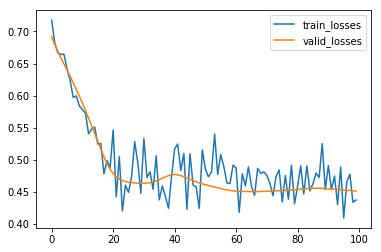

In [9]:
import matplotlib.pyplot as mplot

mplot.plot(train_loss, label='train_losses')
mplot.plot(valid_loss, label='valid_losses')
mplot.legend()
mplot.show()

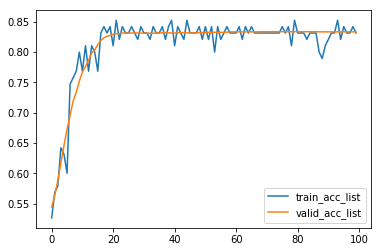

In [10]:
# import matplotlib.pyplot as mplot

mplot.plot(train_acc, label='train_acc_list')
mplot.plot(valid_acc, label='valid_acc_list')
mplot.legend()
mplot.show()